## Импорт библиотек

In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import pandas as pd # Библиотека Pandas для работы с табличными данными

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации

from IPython.display import Math, HTML

## Генерируем данные для зависимости:
  \begin{align}
        y(x) = \frac{{e}^{2x} - {e}^{-4x}\,}{{e}^{4} + {e}^{-8} }
    \end{align}

  data['support'] - рандомные точки от 0 до 10
  
  data['values']  - посчитанное для точек значение функции
  
  data['x_train'] - признаки

  data['y_train'] - целевая переменная

In [ ]:
def generate_exponential_dependence(n_support=1000, n_train=25, std=500000):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 10
    data['support'] = np.linspace(0, 10, num=n_support)
    # для каждой посчитаем значение функции
    # это будет истинная функция
    data['values'] = (np.e**(2*data['support']) - np.e**((-4)*data['support']))/(np.e**4 + np.e**(-8))
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем функцию и добавим шум, получим целевую переменную
    data['y_train'] = (np.e**(2*data['x_train']) - np.e**((-4)*data['x_train']))/(np.e**4 + np.e**(-8)) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_exponential_dependence(1000, 250)

## Визуализируем зависимость


Shape of X is (250,)
Head of X is [0.         0.05005005 0.05005005 0.2002002  0.2002002  0.24024024
 0.28028028 0.4004004  0.41041041 0.43043043]


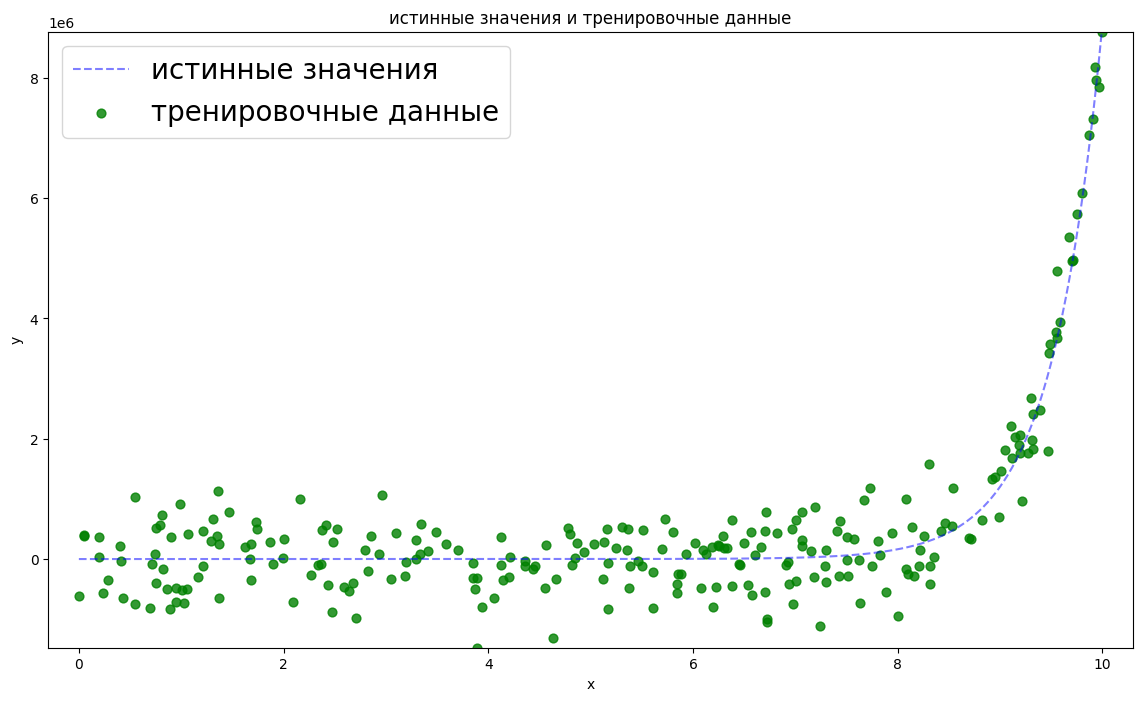

In [ ]:
print( 'Shape of X is', data['x_train'].shape)
print( 'Head of X is', data['x_train'][:10])
margin = 0.3
fig  = plt.figure(figsize=(14,8))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинные значения')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='тренировочные данные')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 20})
plt.title('истинные значения и тренировочные данные')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

пунктиром показана истинная зависимость, зелеными точками - зашумленные данные

## Реализуем алгоритм обучения

In [ ]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(weights, X.T)

Видим, что у нас есть отрицательный и положительный вес

In [ ]:
weights

array([-914414.04121178,  276548.5356814 ])

## Визуализируем предсказание

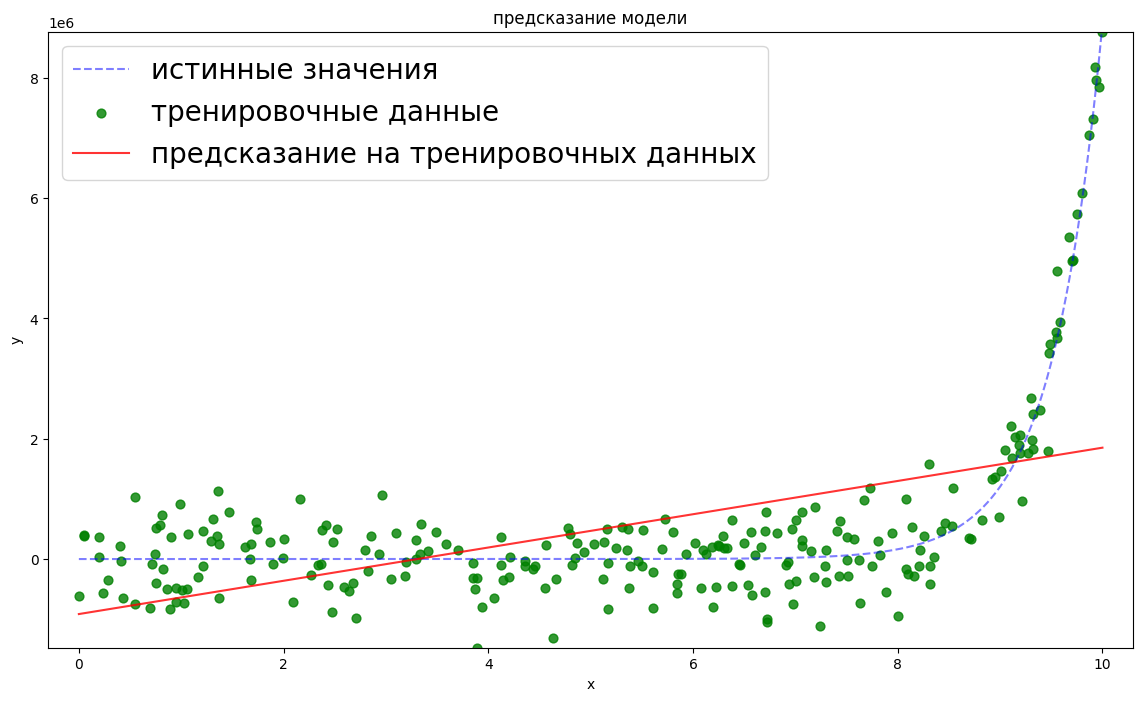

In [ ]:
fig  = plt.figure(figsize=(14,8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинные значения')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='тренировочные данные')
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='предсказание на тренировочных данных')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 20})
plt.title('предсказание модели')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Здесь можно увидеть предсказание модели линейной регрессии. Отчетливо видно, что линейности нам не хватит, будем подключать полиномы!!!

## Полиномиальная регрессия


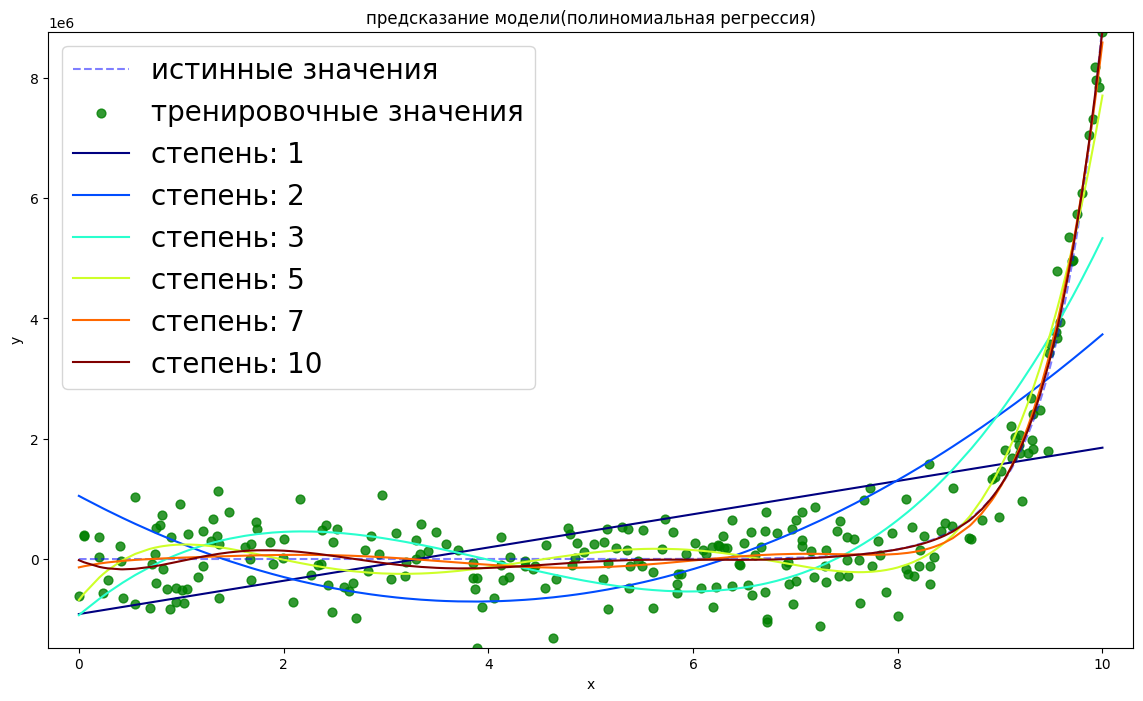

In [ ]:
# список степеней p полиномов, который мы протестируем
degree_list = [1, 2, 3, 5, 7, 10]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
fig  = plt.figure(figsize=(14,8))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинные значения')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='тренировочные значения')

w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + \
                list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='степень: %i' % degree)
    plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
    plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
    plt.legend(loc='upper left', prop={'size': 20})
    plt.title('предсказание модели(полиномиальная регрессия)')
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()


Попробуем отрисовать графики нескольких полиномов разных степеней. И увидим, что при увеличении степени полинома, модель все ближе к правде

In [ ]:
lmbd = 1
degree = 10
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# функция для вычисления среднеквадратичное ошибки
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# начальное приближение
w = np.array([-1.0] * X.shape[1])
# максимальное количество итераций
n_iter = 20
# сделаем скорость обучения очень маленькой, на всякий случай
lr = 0.00000001
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print( loss[-1])

2.6767613890334655e+40
9.658535278444598e+61
3.48508104260443e+83
1.2575188186791743e+105
4.5374944226562577e+126
1.6372602405474947e+148
5.9077121547367056e+169
2.131674735566351e+191
7.691703758126635e+212
2.7753909034842016e+234
1.0014419313802223e+256
3.61349437539604e+277
1.3038540919714373e+299
inf
inf
inf
inf
inf
inf
inf


<ipython-input-91-93d14c163740>:8: RuntimeWarning: overflow encountered in square
  return ((u - v)**2).sum()/u.shape[0]


Даже при такой небольшой скорости обучения, ошибка все равно растет и очень даже стремительно. Причина в том, что каждый признак измеряется в разных масштабах, от небольших чисел у полиномиальных признаков 1-2 степени, до огромных при 10 степени.